In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import constants
from scipy import integrate
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
%matplotlib inline 

/Users/jorge/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Repeat the plot from Session 4, but do not overplot all SEDs on top of each other, but plot them in separate subplots (two columns).
a. Left column objects should be plotted with dashed lines in red.
b. Right column objects should be plotted with asterixes in blue.
c. Add the name of each object and its redshift in the upper left
corner.
d. Add a second y axes (on top) showing the rest-frame wavelength
(wavelength of the band / (1+ redshift))
e. Add axes lables with Greek letters (lambda for wavelength).

In [6]:
fluxes = Table.read('Fluxes.fits')
mu = [0.3543, 0.4770, 0.6231, 0.7625, 0.9134, 1.0305, 1.2483, 1.6313, 2.2010, 3.40, 4.60, 12.00, 22.00]
colnames = ('u', 'g', 'r', 'i', 'z', 'Y', 
            'J', 'H', 'K', 'W1', 'W2', 'W3', 'W4')
colnames_err = ('u_err', 'g_err', 'r_err', 'i_err', 'z_err', 'Y_err', 
            'J_err', 'H_err', 'K_err', 'W1_err', 'W2_err', 'W3_err', 'W4_err')
n_cols = len(colnames)

In [7]:
fig1 = plt.figure(figsize = (7,15))

In [10]:
for i in range(9):
    if i % 2 == 0:
        y, ye = np.zeros(n_cols), np.zeros(n_cols)
        for  j in range(n_cols):
            tmp_col = colnames[j]
            tmp_colerr = colnames_err[j]
            y[j] =  fluxes[i][tmp_col]
            yerr = fluxes[i][tmp_colerr]
            
        ax1 = fig1.add_subplot(5,2,i+1)
        fig1.subplots_adjust(hspace=.5)
        ax1.errorbar(mu,y, yerr = ye, linestyle = 'dashed', color = 'r', label = fluxes[i][0])
        ax1.text(0.05, 0.8,  fluxes[i][0], fontsize = 8,  transform=ax1.transAxes)
        ax1.text(0.05, 0.68, 'z = %s' %fluxes[i][3], fontsize = 8, transform=ax1.transAxes)
        ax1.tick_params(labelsize = 6)
        # add second x axis
        ax2 = ax1.twiny()
    else:
        y, ye = np.zeros(n_cols), np.zeros(n_cols)
        for  j in range(n_cols):
            tmp_col = colnames[j]
            tmp_colerr = colnames_err[j]
            y[j] =  fluxes[i][tmp_col]
            yerr = fluxes[i][tmp_colerr]
            
        ax1  = fig1.add_subplot(5,2,i+1)
        fig1.subplots_adjust(hspace=.5)
        ax1.errorbar(mu,y, yerr = ye, linestyle = 'none', marker = '*', color = 'b', label = fluxes[0][i])
        ax1.text(0.05, 0.8,  fluxes[i][0], fontsize = 8,  transform=ax1.transAxes)
        ax1.text(0.05, 0.68, 'z = %s' %fluxes[i][3], fontsize = 8, transform=ax1.transAxes)
        ax1.tick_params(labelsize = 6)
        # add second x axis
        ax2 = ax1.twiny()
        # set range for second x axis right, be careful with xlim
    ax2.set_xscale('log')
    ax2.set_xlim(0.1/(1.+fluxes[i][3]),100.*(1.+fluxes[i][3]))
    ax2.tick_params(labelsize = 6)
    ax2.set_xlabel('rest-frame $\\lambda$ ($\\mu$m)', fontsize = 8)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_xlabel('observed $\\lambda$ ($\\mu$m)', fontsize = 8)
    ax1.set_ylabel('flux (mJy)', fontsize = 8)
    ax1.set_xlim(0.1, 100.)
        
fig1.savefig('multiplot.pdf')        

Plot a simple histogram of redshifts of the objects.

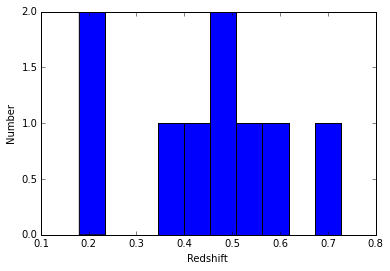

In [11]:
plt.hist(fluxes['redshift'])
plt.xlabel('Redshift')
plt.ylabel('Number')

In [12]:
image2 = fits.open('IR_images/W4/0105m016_ac51-w4.fits')
image_data = image2[0].data

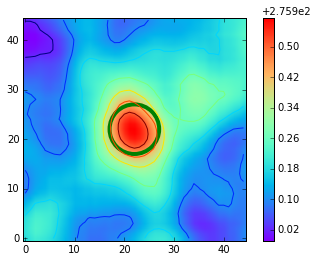

In [13]:
from matplotlib import patches
plt.imshow(image_data, origin = 'lower', cmap=plt.cm.rainbow)
plt.colorbar()
plt.contour(image_data)
max_val = np.where(image_data == np.max(image_data))
p1=patches.Circle((max_val[1], max_val[0]), radius = 5., edgecolor='g', facecolor='None', linewidth=4 )
plt.gca().add_patch(p1)